# Save GLM on HRRR grid data objects


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import multiprocessing
import os

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/')
from BB_HRRR.HRRR_Pando import get_hrrr_variable, get_hrrr_latlon
from BB_GOES.get_GOES import get_GOES_nearesttime
from BB_GOES.get_GLM import get_GLM_file_nearesttime, accumulate_GLM_FAST, filter_by_HRRR
from BB_datetimes.range import range_dates
from BB_maps.my_basemap import draw_HRRR_map, draw_centermap

from BB_HRRR.GLM_and_HRRR.GLM_events_HRRR import get_GLM_HRRR_contingency_stats

#from fires_list import get_fire

In [4]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [16, 8]
mpl.rcParams['figure.titlesize'] = 12
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['lines.linewidth'] = 1.25
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.03
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 7
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
    
#mpl.rcParams['savefig.dpi'] = 600    # 600 for print

In [5]:
mU = draw_centermap('Utah', size=(4,4))

In [6]:
m = draw_HRRR_map()
lat, lon = get_hrrr_latlon(DICT=False)

loaded /uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_maps/saved_map_objects/HRRR_lcc_i_2000.npy map from file


In [7]:
DATE = datetime(2018, 5, 1, 14)

In [8]:
BASE = '/uufs/chpc.utah.edu/common/home/horel-group8/blaylock/GLM-HRRR_LTNG_binary/'
FILE = BASE+'/HRRR-GLM-Binary_%s.npy' % DATE.strftime('%Y-%m-%d_%H%M')
stats = np.load(FILE).item()

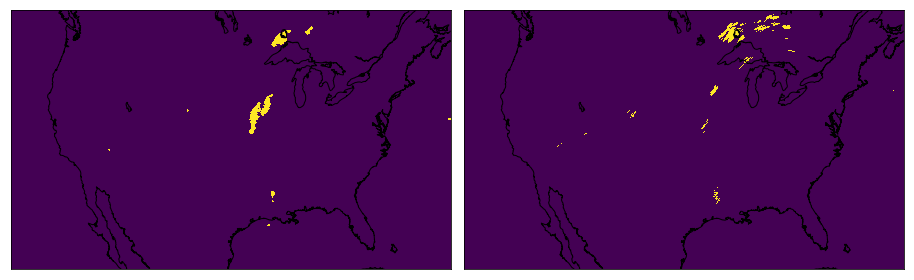

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2)

plt.sca(ax1)
m.pcolormesh(lon, lat, stats['Observed Binary'], latlon=True)
m.drawcoastlines()

plt.sca(ax2)
m.pcolormesh(lon, lat, stats['Forecast Binary'][5], latlon=True)
m.drawcoastlines()

In [10]:
DATE = datetime(2018, 5, 1, 1)

In [11]:
BASE = '/uufs/chpc.utah.edu/common/home/horel-group8/blaylock/GLM-HRRR_LTNG_binary/'
FILE = BASE+'/HRRR-GLM-Binary_%s.npy' % DATE.strftime('%Y-%m-%d_%H%M')
stats = np.load(FILE).item()

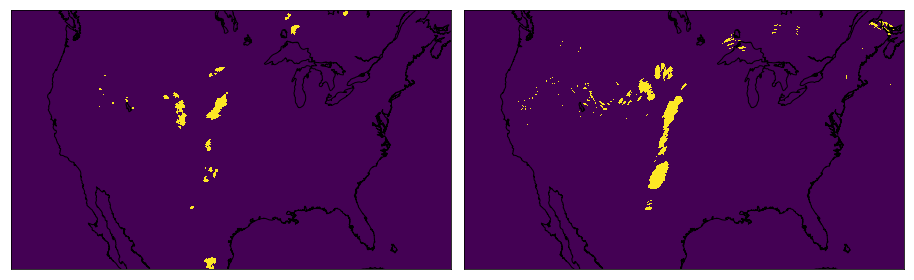

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2)

plt.sca(ax1)
m.pcolormesh(lon, lat, stats['Observed Binary'], latlon=True)
m.drawcoastlines()

plt.sca(ax2)
m.pcolormesh(lon, lat, stats['Forecast Binary'][17], latlon=True)
m.drawcoastlines()

In [13]:
sDATE = datetime(2019, 5, 7, 13)
eDATE = datetime(2019, 5, 8, 13)
DATES = range_dates(sDATE, eDATE, HOURS=1)

>>> get_GLM_HRRR_contingency_stats: 2019-05-07 13:00:00
>>No previous file saved. Need to generate binary stats right now...
(1/7) Get GLM Events. 2019-05-07 13:00:00
-->> Accumulate GLM FAST MP: 45.0%
Got 180 of 180 expected files.
Total Events: 1,084,296
(2/7) Get HRRR Data.
-->> Accumulate GLM FAST MP: 25.0%(3/7) Filter GLM.
(4/7) Put GLM on HRRR grid.
In-HRRR Events: 217,022
        217,022 events in HRRR
            886 events in West
        203,218 events in Central
         12,918 events in East
              0 events in Utah
          4,414 events in Colorado
         31,301 events in Texas
              7 events in Florida
(5/7) Bloat GLM data with spatial filter.
(6/7) Generate binary grids.
(7/7) Compute contingency table for each subdomain.
    Stats for HRRR
    Stats for West
    Stats for Central
    Stats for East
    Stats for Utah
    Stats for Colorado
    Stats for Texas
    Stats for Florida
(FIN)

***Saved Binary Dictionary: /uufs/chpc.utah.edu/common/home/horel-

/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


>>> get_GLM_HRRR_contingency_stats: 2019-05-07 14:00:00
>>No previous file saved. Need to generate binary stats right now...
(1/7) Get GLM Events. 2019-05-07 14:00:00
-->> Accumulate GLM FAST MP: 80.0%
Got 180 of 180 expected files.
Total Events: 629,540
(2/7) Get HRRR Data.
-->> Accumulate GLM FAST MP: 95.0%(3/7) Filter GLM.
(4/7) Put GLM on HRRR grid.
In-HRRR Events: 173,410
        173,410 events in HRRR
          1,017 events in West
        163,294 events in Central
          9,099 events in East
            739 events in Utah
            101 events in Colorado
         42,077 events in Texas
              0 events in Florida
(5/7) Bloat GLM data with spatial filter.
(6/7) Generate binary grids.
(7/7) Compute contingency table for each subdomain.
    Stats for HRRR
    Stats for West
    Stats for Central
    Stats for East
    Stats for Utah
    Stats for Colorado
    Stats for Texas
    Stats for Florida
(FIN)

***Saved Binary Dictionary: /uufs/chpc.utah.edu/common/home/horel-gr

/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


>>> get_GLM_HRRR_contingency_stats: 2019-05-08 10:00:00
>>No previous file saved. Need to generate binary stats right now...
(1/7) Get GLM Events. 2019-05-08 10:00:00
-->> Accumulate GLM FAST MP: 35.0%
Got 180 of 180 expected files.
Total Events: 3,383,300
(2/7) Get HRRR Data.
-->> Accumulate GLM FAST MP: 80.0%(3/7) Filter GLM.
(4/7) Put GLM on HRRR grid.
In-HRRR Events: 2,496,206
      2,496,206 events in HRRR
          1,724 events in West
      2,250,550 events in Central
        243,858 events in East
            375 events in Utah
         16,633 events in Colorado
      1,326,134 events in Texas
              0 events in Florida
(5/7) Bloat GLM data with spatial filter.
(6/7) Generate binary grids.
(7/7) Compute contingency table for each subdomain.
    Stats for HRRR
    Stats for West
    Stats for Central
    Stats for East
    Stats for Utah
    Stats for Colorado
    Stats for Texas
    Stats for Florida
(FIN)

***Saved Binary Dictionary: /uufs/chpc.utah.edu/common/home/hore

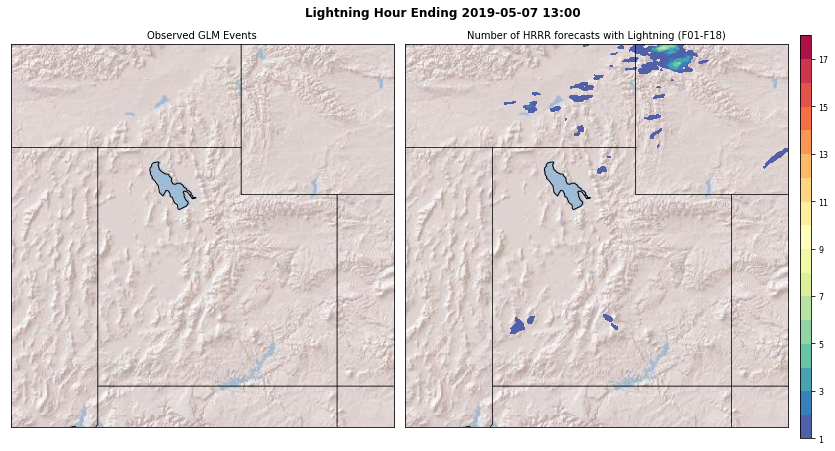

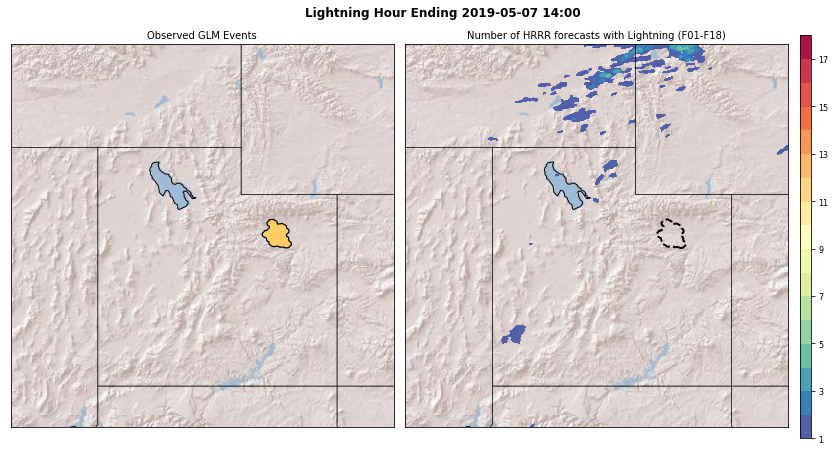

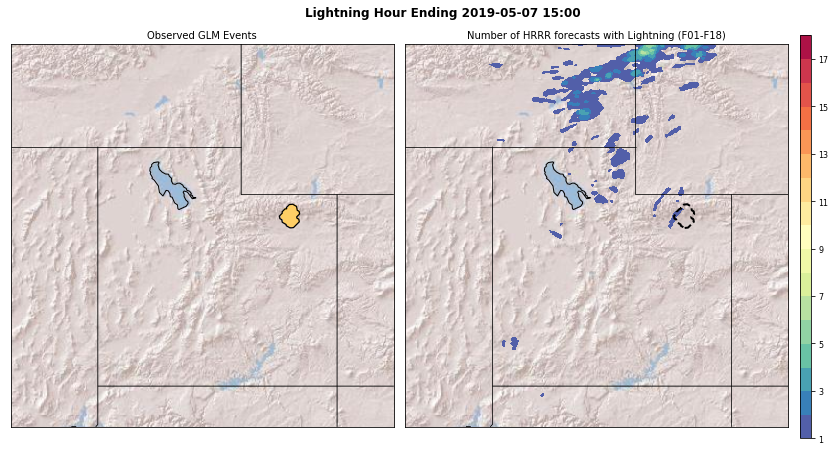

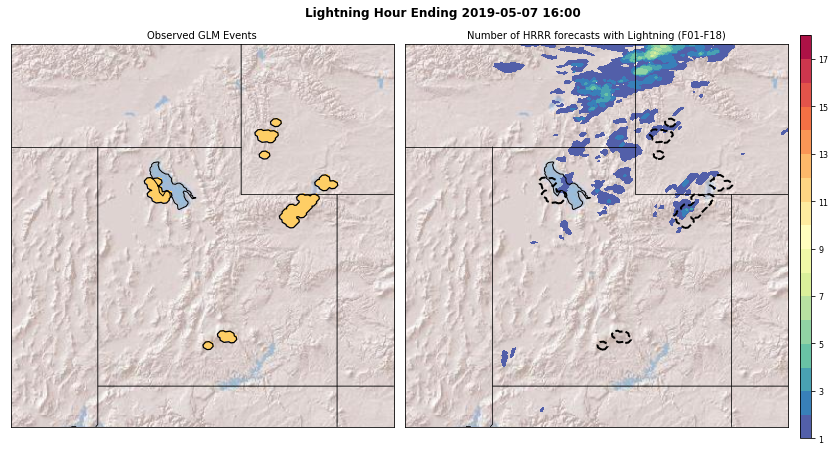

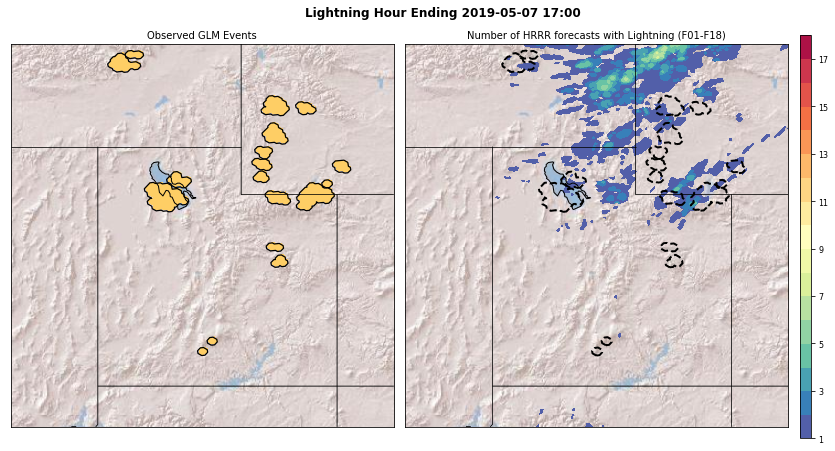

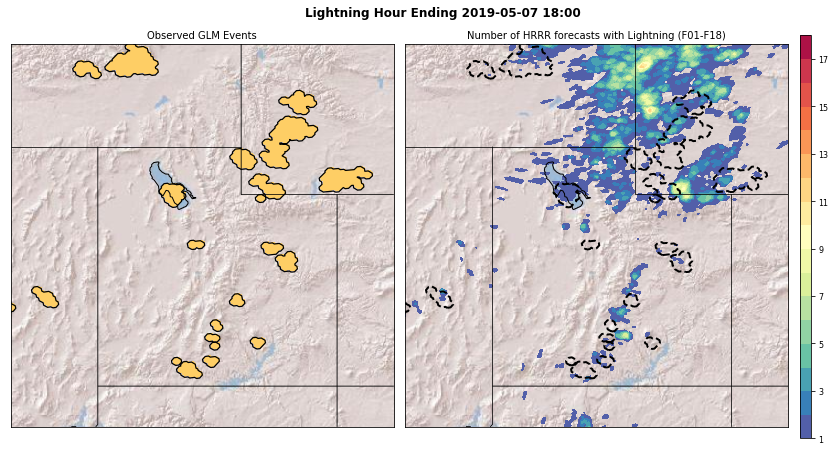

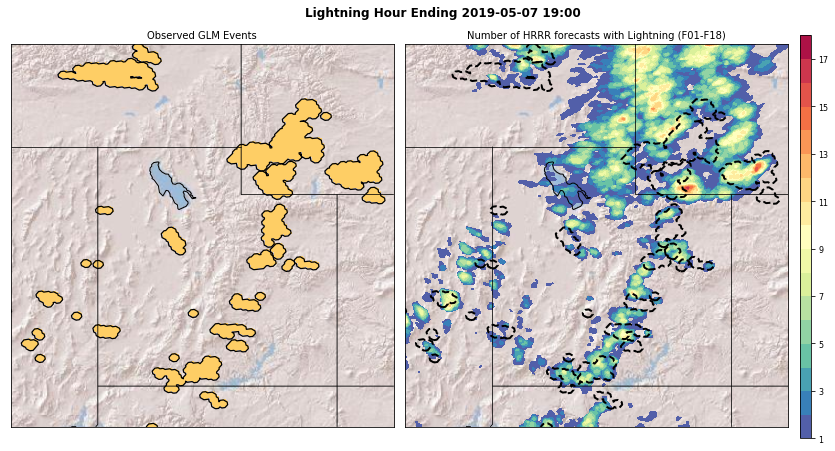

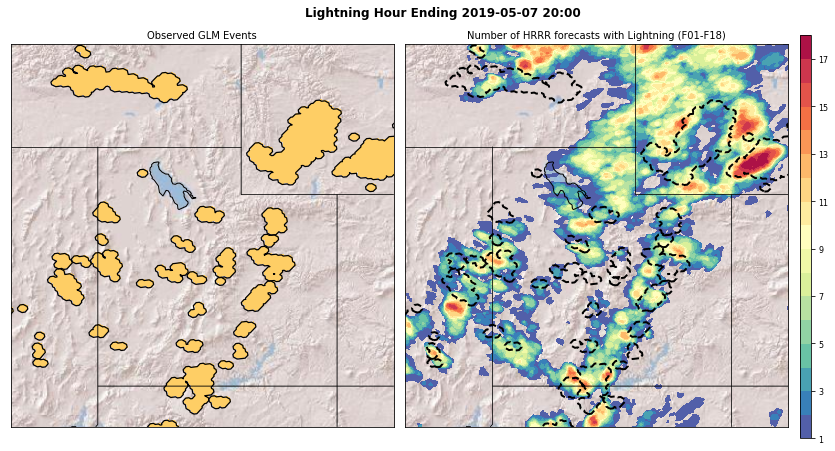

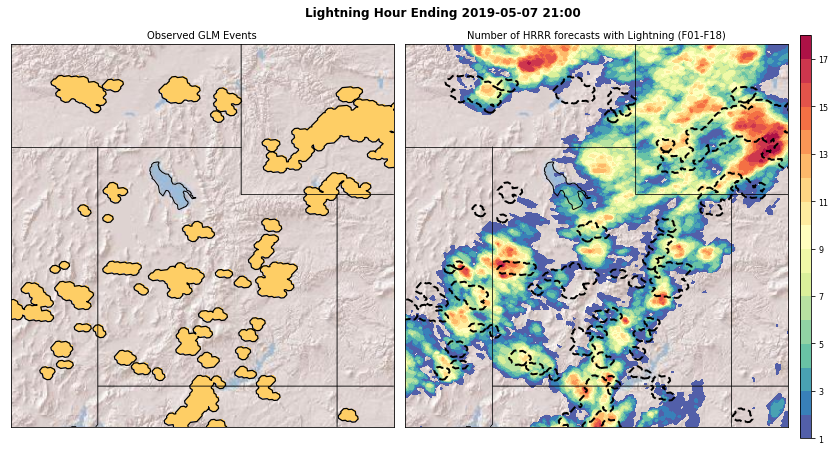

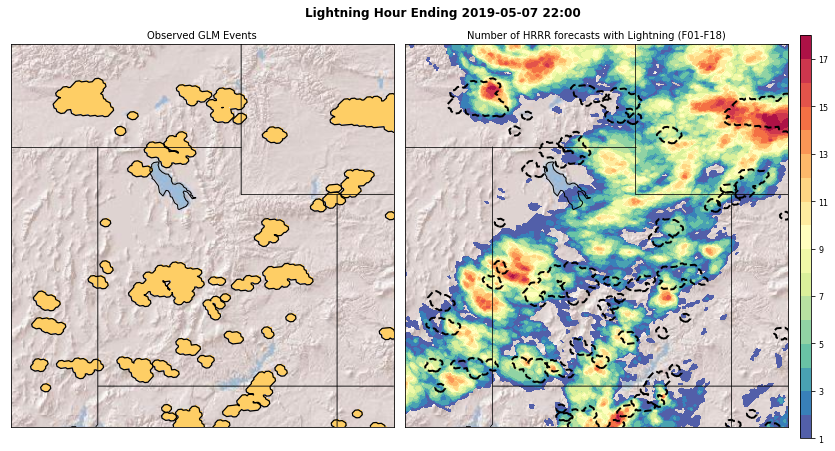

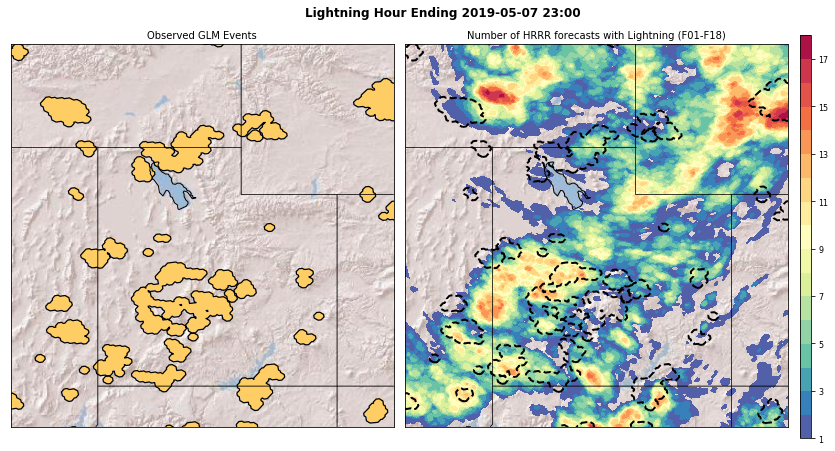

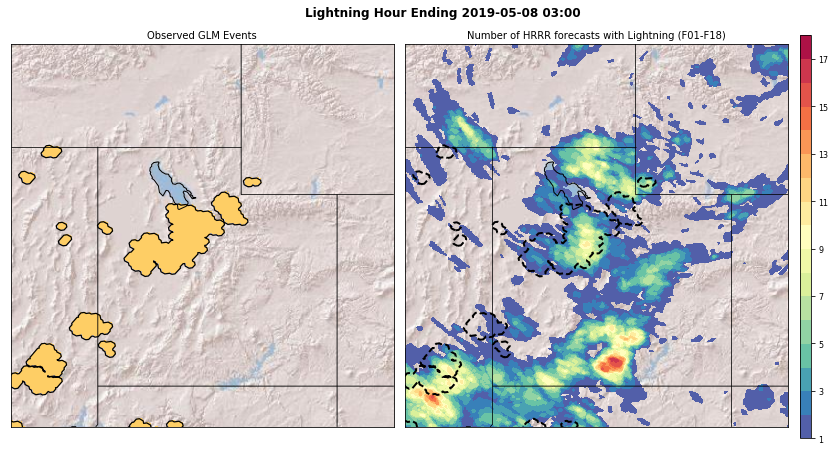

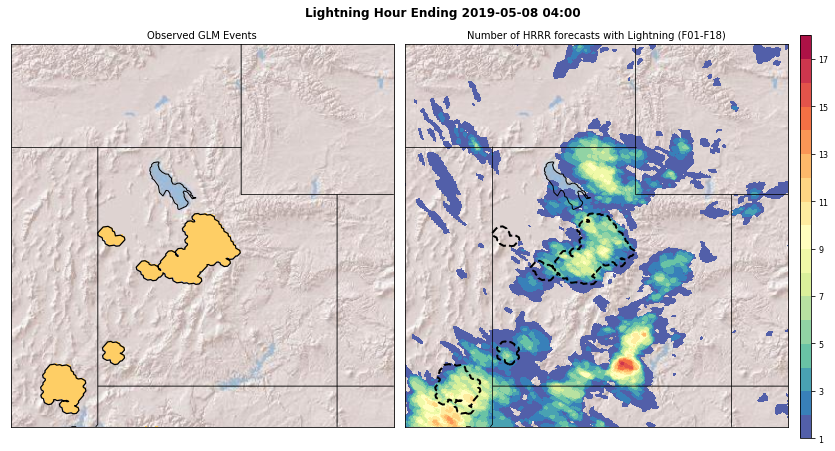

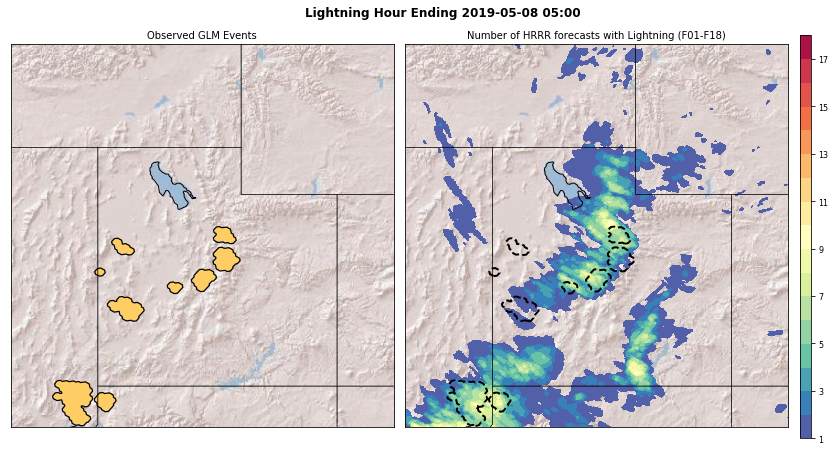

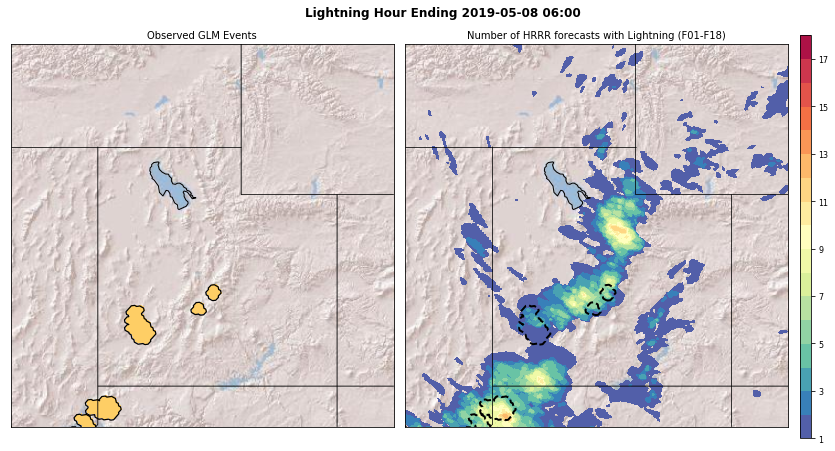

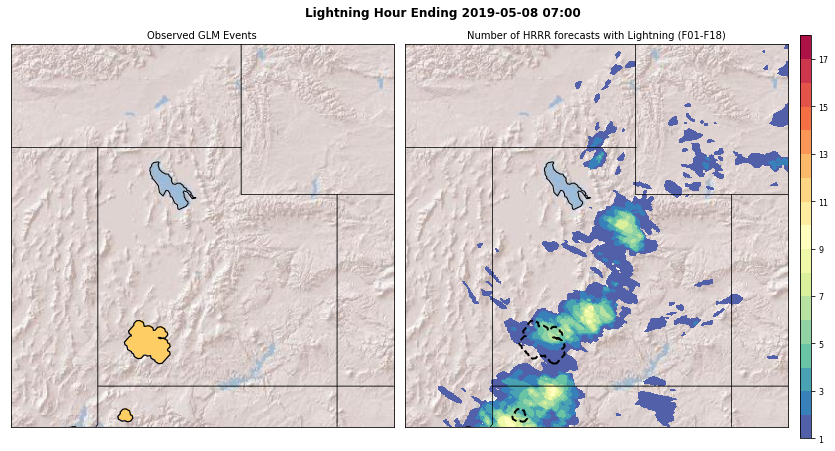

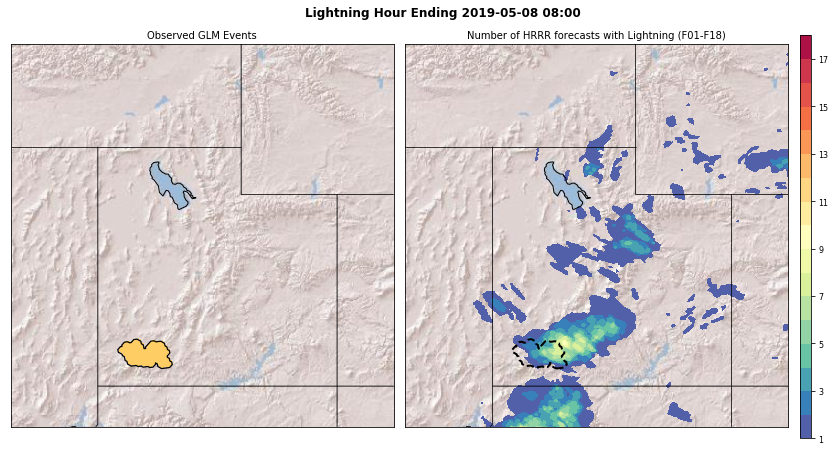

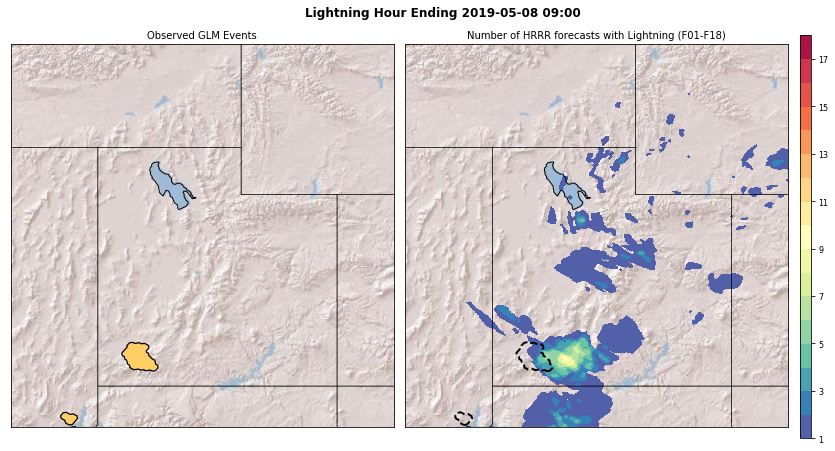

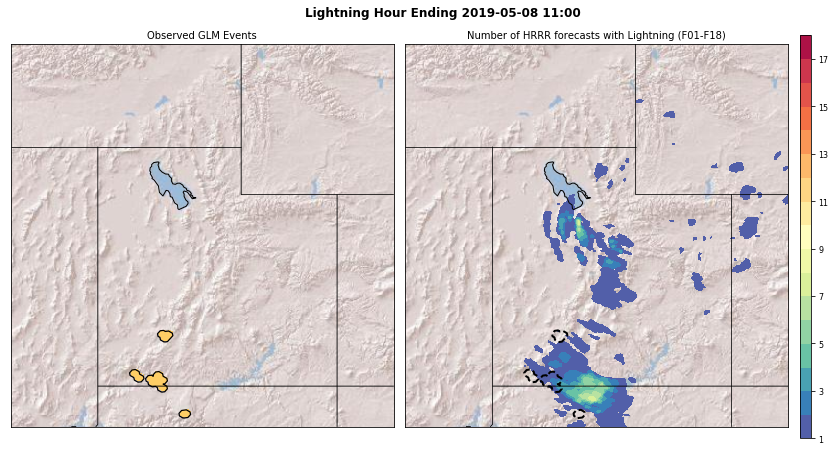

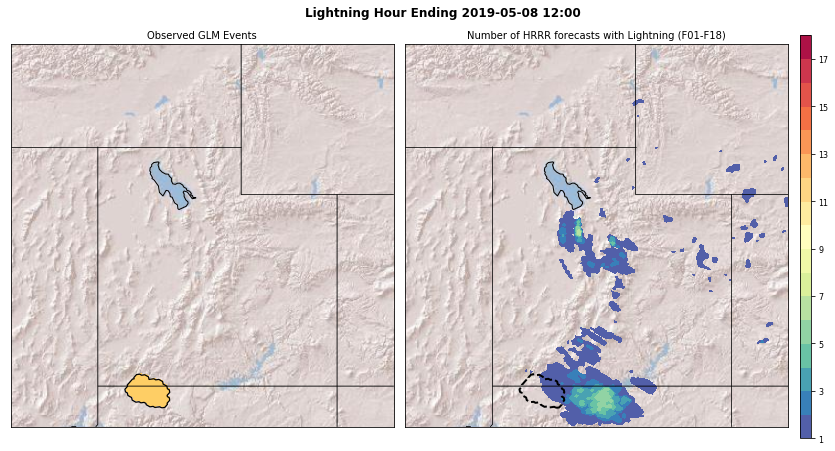

In [14]:
for DATE in DATES:
    custom = get_GLM_HRRR_contingency_stats(DATE)
    fig, (ax1, ax2) = plt.subplots(1,2)

    plt.sca(ax1)
    obs_masked = np.ma.array(custom['Observed Binary'], mask=custom['Observed Binary']==0)
    mU.pcolormesh(lon, lat, obs_masked, latlon=True, cmap='YlOrBr', vmax=3, vmin=0)
    mU.contour(lon, lat, obs_masked.data, latlon=True, levels=[0,1], colors='k')
    mU.drawcoastlines(); mU.drawstates()
    mU.arcgisimage(service='World_Shaded_Relief')

    plt.title('Observed GLM Events')

    plt.sca(ax2)
    fxx_num = np.sum(custom['Forecast Binary'], axis=0)
    fxx_masked = np.ma.array(fxx_num, mask=fxx_num==0)
    #mU.pcolormesh(lon, lat, fxx_masked, latlon=True)
    im = mU.contourf(lon, lat, fxx_masked, latlon=True, levels=range(1,19,1), cmap='Spectral_r')

    mU.contour(lon, lat, obs_masked.data, latlon=True, levels=[0,1], colors='k', linestyles='--', linewidths=2)

    mU.drawcoastlines(); mU.drawstates()
    mU.arcgisimage(service='World_Shaded_Relief')
    plt.title('Number of HRRR forecasts with Lightning (F01-F18)')

    plt.suptitle('Lightning Hour Ending %s' % custom['DATETIME'].strftime('%Y-%m-%d %H:%M'), y=.9)

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.81, 0.15, 0.01, 0.7]) # [left-right, updown, width, height]
    fig.colorbar(im, cax=cbar_ax)

    plt.savefig('/uufs/chpc.utah.edu/common/home/u0553130/public_html/Events/Thunderstorm_2019-05-07/%s' % custom['DATETIME'].strftime('%Y-%m-%d_%H%M'))
